# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES
import data_download as dd
import data_download_2 as dd2

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Set parameters
confidence_level = 0.99
holding_period = 1

First is with past data download function, second is with the second version.

In [3]:
# # Step 1: Define tickers and shares
# tickers = [
#     "AAPL", "MSFT", "NVDA", "GOOGL", "JPM",
#     "UNH", "KO", "PEP", "BMW.DE", "NESN.SW",
#     "NOVN.SW", "ASML.AS"
# ]

# # Assign number of shares per asset
# shares = pd.Series(10, index=tickers)

# # Step 2: Download adjusted prices
# prices = dd.get_raw_prices(tickers, start="2022-01-01")

# # Step 3: Compute monetary positions
# position_data = prices * shares

# # Step 4: Convert positions to CHF
# position_data = dd.convert_to_base(position_data, base="CHF")

# # Step 5: Compute returns and summary stats
# returns, mean_returns, covariance_matrix = dd.compute_returns_stats(position_data)

# # Step 6: Display results
# print(f"\nPortfolio final value in CHF: {position_data.sum(axis=1).iloc[-1]:.2f}")
# print("\nSample of daily returns:\n", returns.head())
# print("\nMean returns (daily, in CHF):\n", mean_returns)
# print("\nCovariance matrix (in CHF):\n", covariance_matrix)


In [4]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": 12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Step 1–2: Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd2.get_raw_prices(tickers, start="2022-01-01")

# Step 3: Convert prices to base currency (e.g. CHF)
prices_converted = dd2.convert_to_base(prices, base="CHF")

# Step 4: Create portfolio with monetary positions
position_data = dd2.create_portfolio(prices_converted, shares)

# Step 5: Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd2.compute_returns_stats(position_data)

# Step 6: Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFUSD=X, CHFEUR=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 10542.10

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date

In [5]:
position_data.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1631.340270,1405.115070,-229.284607,789.596759,938.395414,588.583289,1484.853865,23.019710,97.372501,219.371740,717.262177,1747.324440
2022-01-04,1621.859208,1365.095238,-236.608501,791.852676,980.756864,602.579480,1469.562795,23.069589,97.542194,214.806067,723.304093,1719.636136
2022-01-05,1575.073415,1338.897954,-240.794360,753.781242,960.603849,606.174158,1409.886775,22.446089,98.305870,201.973961,724.092213,1711.437103
2022-01-06,1550.775080,1319.233699,-241.675322,754.601397,972.059719,603.759874,1400.547564,22.396208,98.911949,206.439367,725.191666,1643.512635
2022-01-07,1559.092981,1335.918567,-240.814400,753.880546,985.982268,604.995039,1407.386614,22.171745,99.069534,200.491176,729.283190,1611.858596


In [6]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [7]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2022-01-04,281.053333,417.609261,136.555927
2022-01-05,273.515446,407.214007,133.698560
2022-01-06,270.575411,402.436457,131.861046
2022-01-07,271.031202,402.912301,131.881099
2022-01-10,268.629508,398.658707,130.029199


### Marginal VaR

In [8]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [9]:
marginal_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.037149,0.033212,0.011885,0.037370,0.025592,0.014044,0.035402,0.004182,0.004061,0.055380,0.014378,0.023441
2022-01-05,0.037064,0.033148,0.011840,0.037181,0.025614,0.014152,0.035261,0.004229,0.004132,0.055050,0.014494,0.023704
2022-01-06,0.037117,0.033182,0.011850,0.037289,0.025702,0.014142,0.035342,0.004218,0.004111,0.055263,0.014483,0.023445
2022-01-07,0.037152,0.033352,0.011924,0.037309,0.025740,0.014126,0.035365,0.004228,0.004112,0.055287,0.014462,0.023245
2022-01-10,0.037233,0.032608,0.011687,0.037387,0.025805,0.014231,0.035413,0.004197,0.004092,0.055124,0.014593,0.023531


### Incremental, Component and Relative Component VaR

In [10]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [11]:
component_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,60.251043,45.336986,-2.812044,29.591360,25.099770,8.462438,52.025787,0.096475,0.396102,11.895928,10.399422,40.310067
2022-01-05,58.378102,44.381902,-2.851078,28.026080,24.604778,8.578613,49.714472,0.094916,0.406179,11.118577,10.495250,40.567655
2022-01-06,57.560195,43.775421,-2.863951,28.138694,24.983514,8.538081,49.498256,0.094470,0.406626,11.408492,10.503084,38.532528
2022-01-07,57.922695,44.555823,-2.871382,28.126258,25.379474,8.546112,49.771896,0.093732,0.407393,11.084460,10.546606,37.468134
2022-01-10,57.895543,40.868752,-2.868286,28.446095,25.396419,8.600078,49.738248,0.091140,0.408681,11.083061,10.618641,38.351137


In [12]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [13]:
rcvar_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.214376,0.161311,-0.010005,0.105287,0.089306,0.030110,0.185110,0.000343,0.001409,0.042326,0.037002,0.143425
2022-01-05,0.213436,0.162265,-0.010424,0.102466,0.089958,0.031364,0.181761,0.000347,0.001485,0.040651,0.038372,0.148319
2022-01-06,0.212733,0.161786,-0.010585,0.103996,0.092335,0.031555,0.182937,0.000349,0.001503,0.042164,0.038818,0.142410
2022-01-07,0.213712,0.164394,-0.010594,0.103775,0.093640,0.031532,0.183639,0.000346,0.001503,0.040897,0.038913,0.138243
2022-01-10,0.215522,0.152138,-0.010677,0.105893,0.094541,0.032015,0.185156,0.000339,0.001521,0.041258,0.039529,0.142766


In [14]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [15]:
ivar_series.head()

Date
2022-01-04    332.115916
2022-01-05    331.480841
2022-01-06    331.824615
2022-01-07    333.521995
2022-01-10    326.079410
dtype: float64

### ES Test

In [16]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [17]:
marginal_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.042561,0.038049,0.013616,0.042813,0.029320,0.016089,0.040559,0.004791,0.004652,0.063447,0.016472,0.026856
2022-01-05,0.042463,0.037977,0.013565,0.042597,0.029345,0.016214,0.040398,0.004845,0.004734,0.063068,0.016606,0.027157
2022-01-06,0.042524,0.038016,0.013577,0.042721,0.029445,0.016201,0.040490,0.004833,0.004710,0.063313,0.016593,0.026860
2022-01-07,0.042563,0.038210,0.013660,0.042743,0.029490,0.016184,0.040516,0.004843,0.004711,0.063340,0.016568,0.026631
2022-01-10,0.042657,0.037358,0.013389,0.042833,0.029563,0.016304,0.040572,0.004808,0.004688,0.063154,0.016719,0.026959


In [18]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [19]:
component_es_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,69.027483,51.940976,-3.221660,33.901771,28.755916,9.695114,59.604099,0.110527,0.453800,13.628743,11.914248,46.181814
2022-01-05,66.881720,50.846770,-3.266379,32.108485,28.188821,9.828213,56.956107,0.108742,0.465345,12.738159,12.024036,46.476924
2022-01-06,65.944673,50.151947,-3.281127,32.237503,28.622726,9.781777,56.708396,0.108231,0.465857,13.070304,12.033010,44.145350
2022-01-07,66.359977,51.046025,-3.289640,32.223256,29.076363,9.790977,57.021895,0.107385,0.466736,12.699073,12.082873,42.925911
2022-01-10,66.328869,46.821879,-3.286093,32.589682,29.095776,9.852804,56.983346,0.104416,0.468211,12.697469,12.165400,43.937537


In [20]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [21]:
res_df.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-04,0.214376,0.161311,-0.010005,0.105287,0.089306,0.030110,0.185110,0.000343,0.001409,0.042326,0.037002,0.143425
2022-01-05,0.213436,0.162265,-0.010424,0.102466,0.089958,0.031364,0.181761,0.000347,0.001485,0.040651,0.038372,0.148319
2022-01-06,0.212733,0.161786,-0.010585,0.103996,0.092335,0.031555,0.182937,0.000349,0.001503,0.042164,0.038818,0.142410
2022-01-07,0.213712,0.164394,-0.010594,0.103775,0.093640,0.031532,0.183639,0.000346,0.001503,0.040897,0.038913,0.138243
2022-01-10,0.215522,0.152138,-0.010677,0.105893,0.094541,0.032015,0.185156,0.000339,0.001521,0.041258,0.039529,0.142766


In [22]:
# Define change in position
change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [23]:
ies_series.head()

Date
2022-01-04    380.493421
2022-01-05    379.765839
2022-01-06    380.159688
2022-01-07    382.104316
2022-01-10    373.577610
dtype: float64

### Visualizations


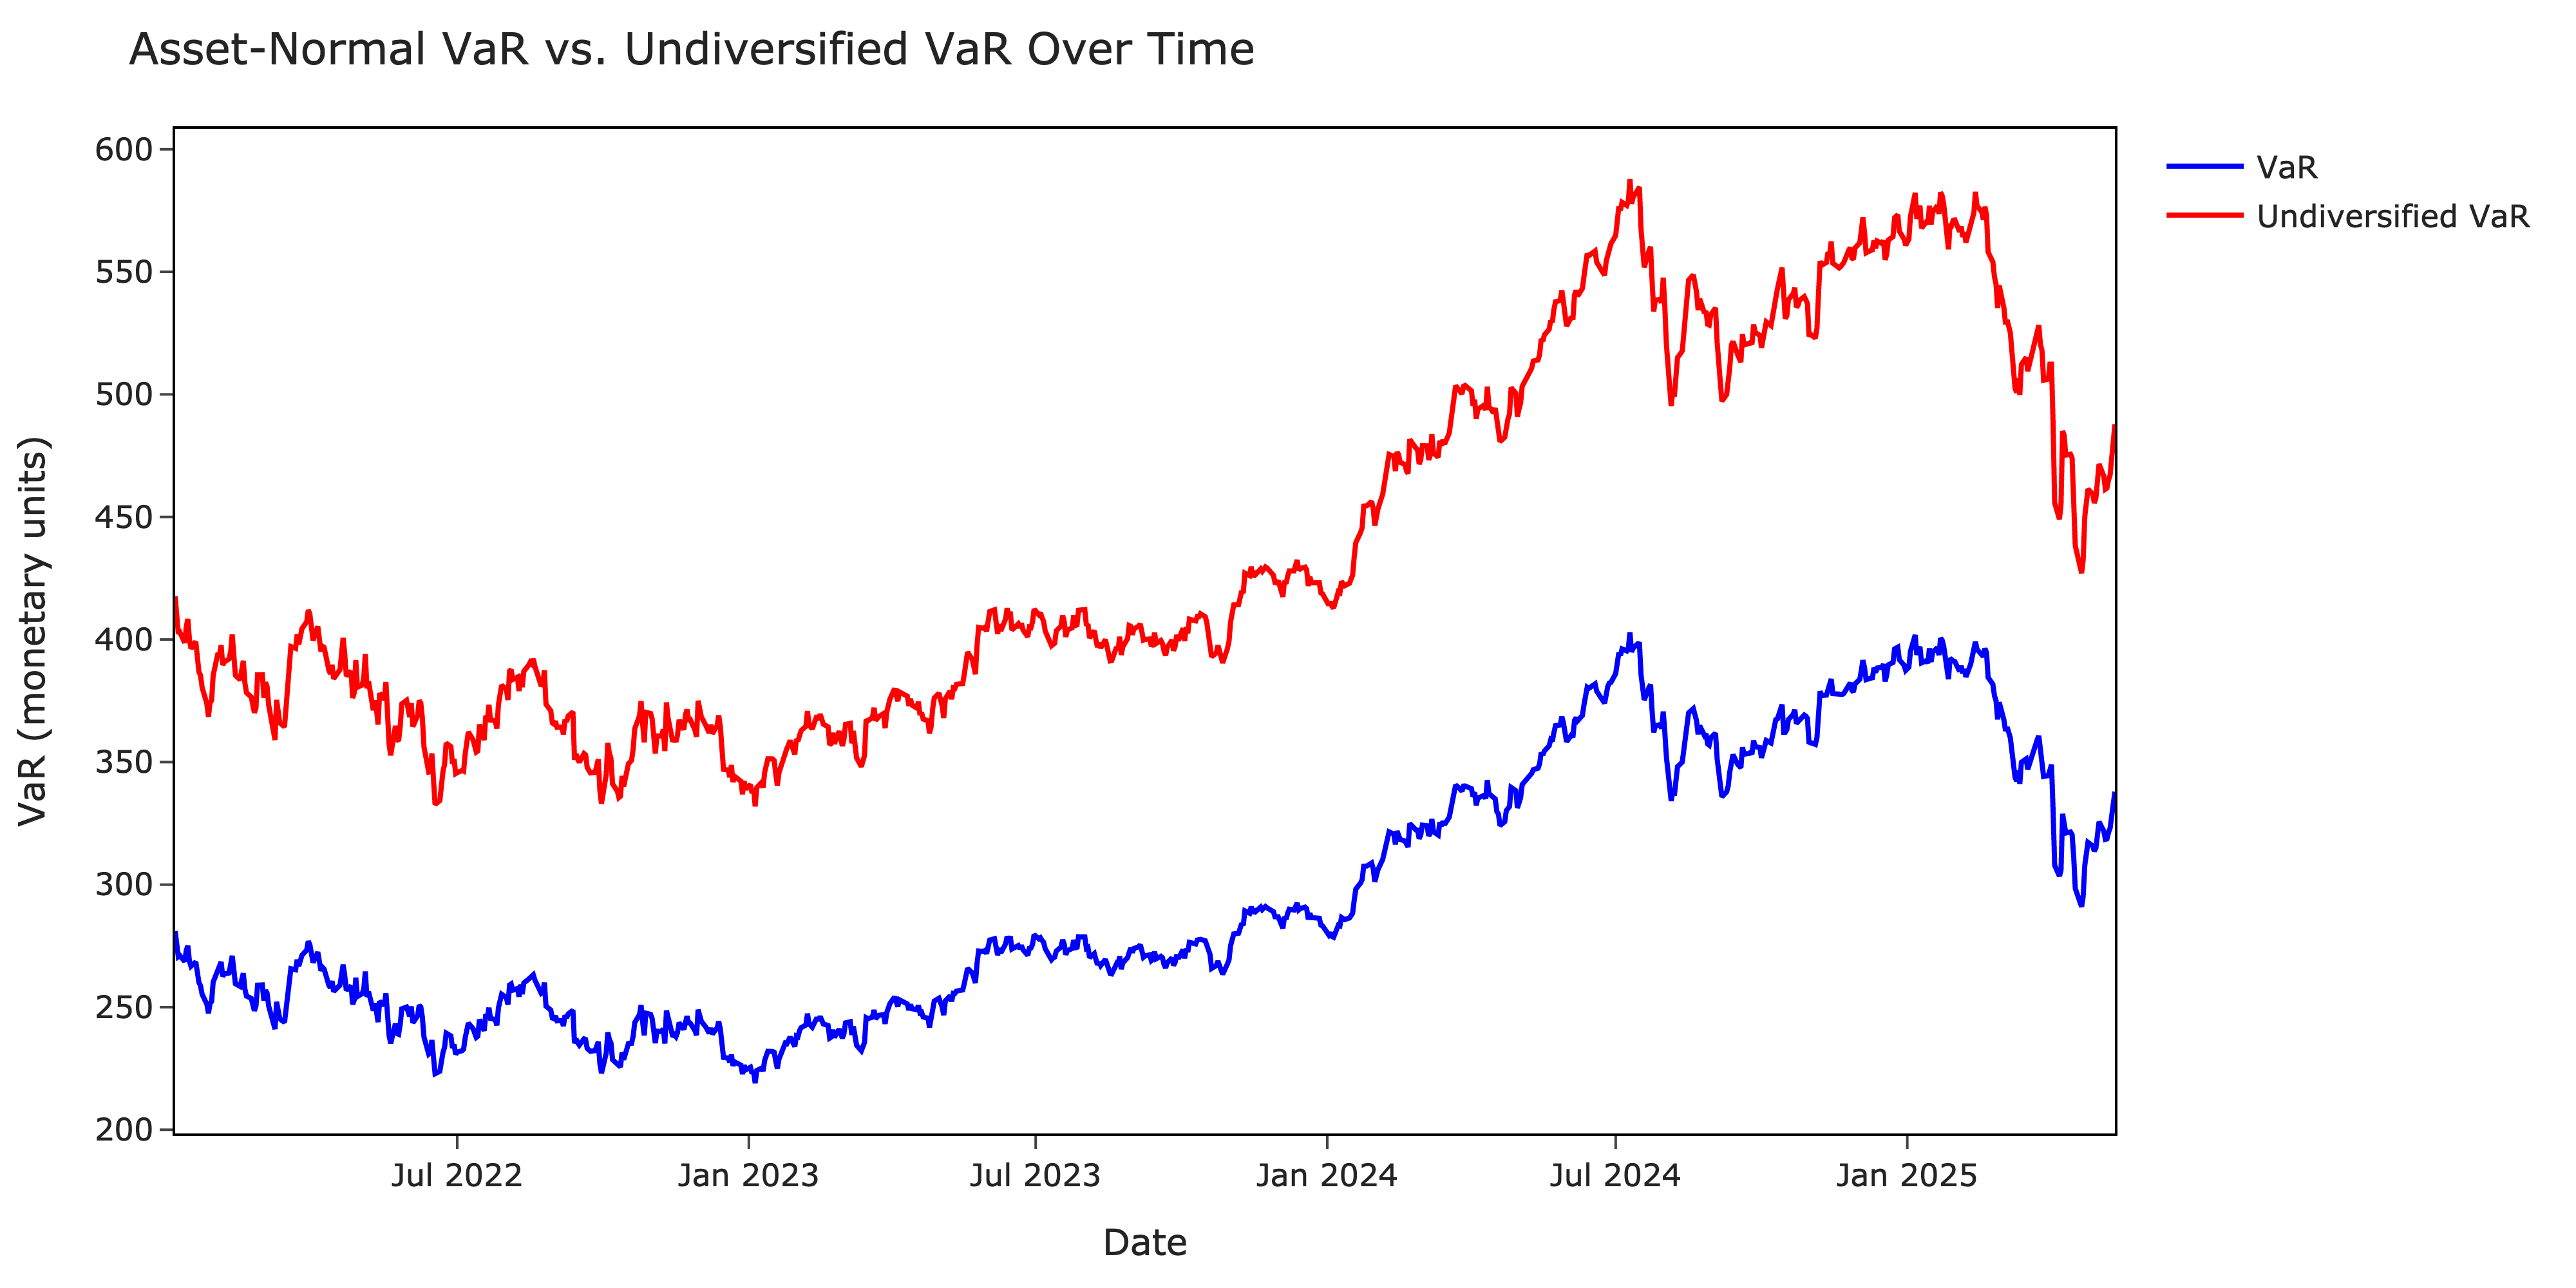

In [24]:
pl.plot_var_series(summary_df, interactive=False)


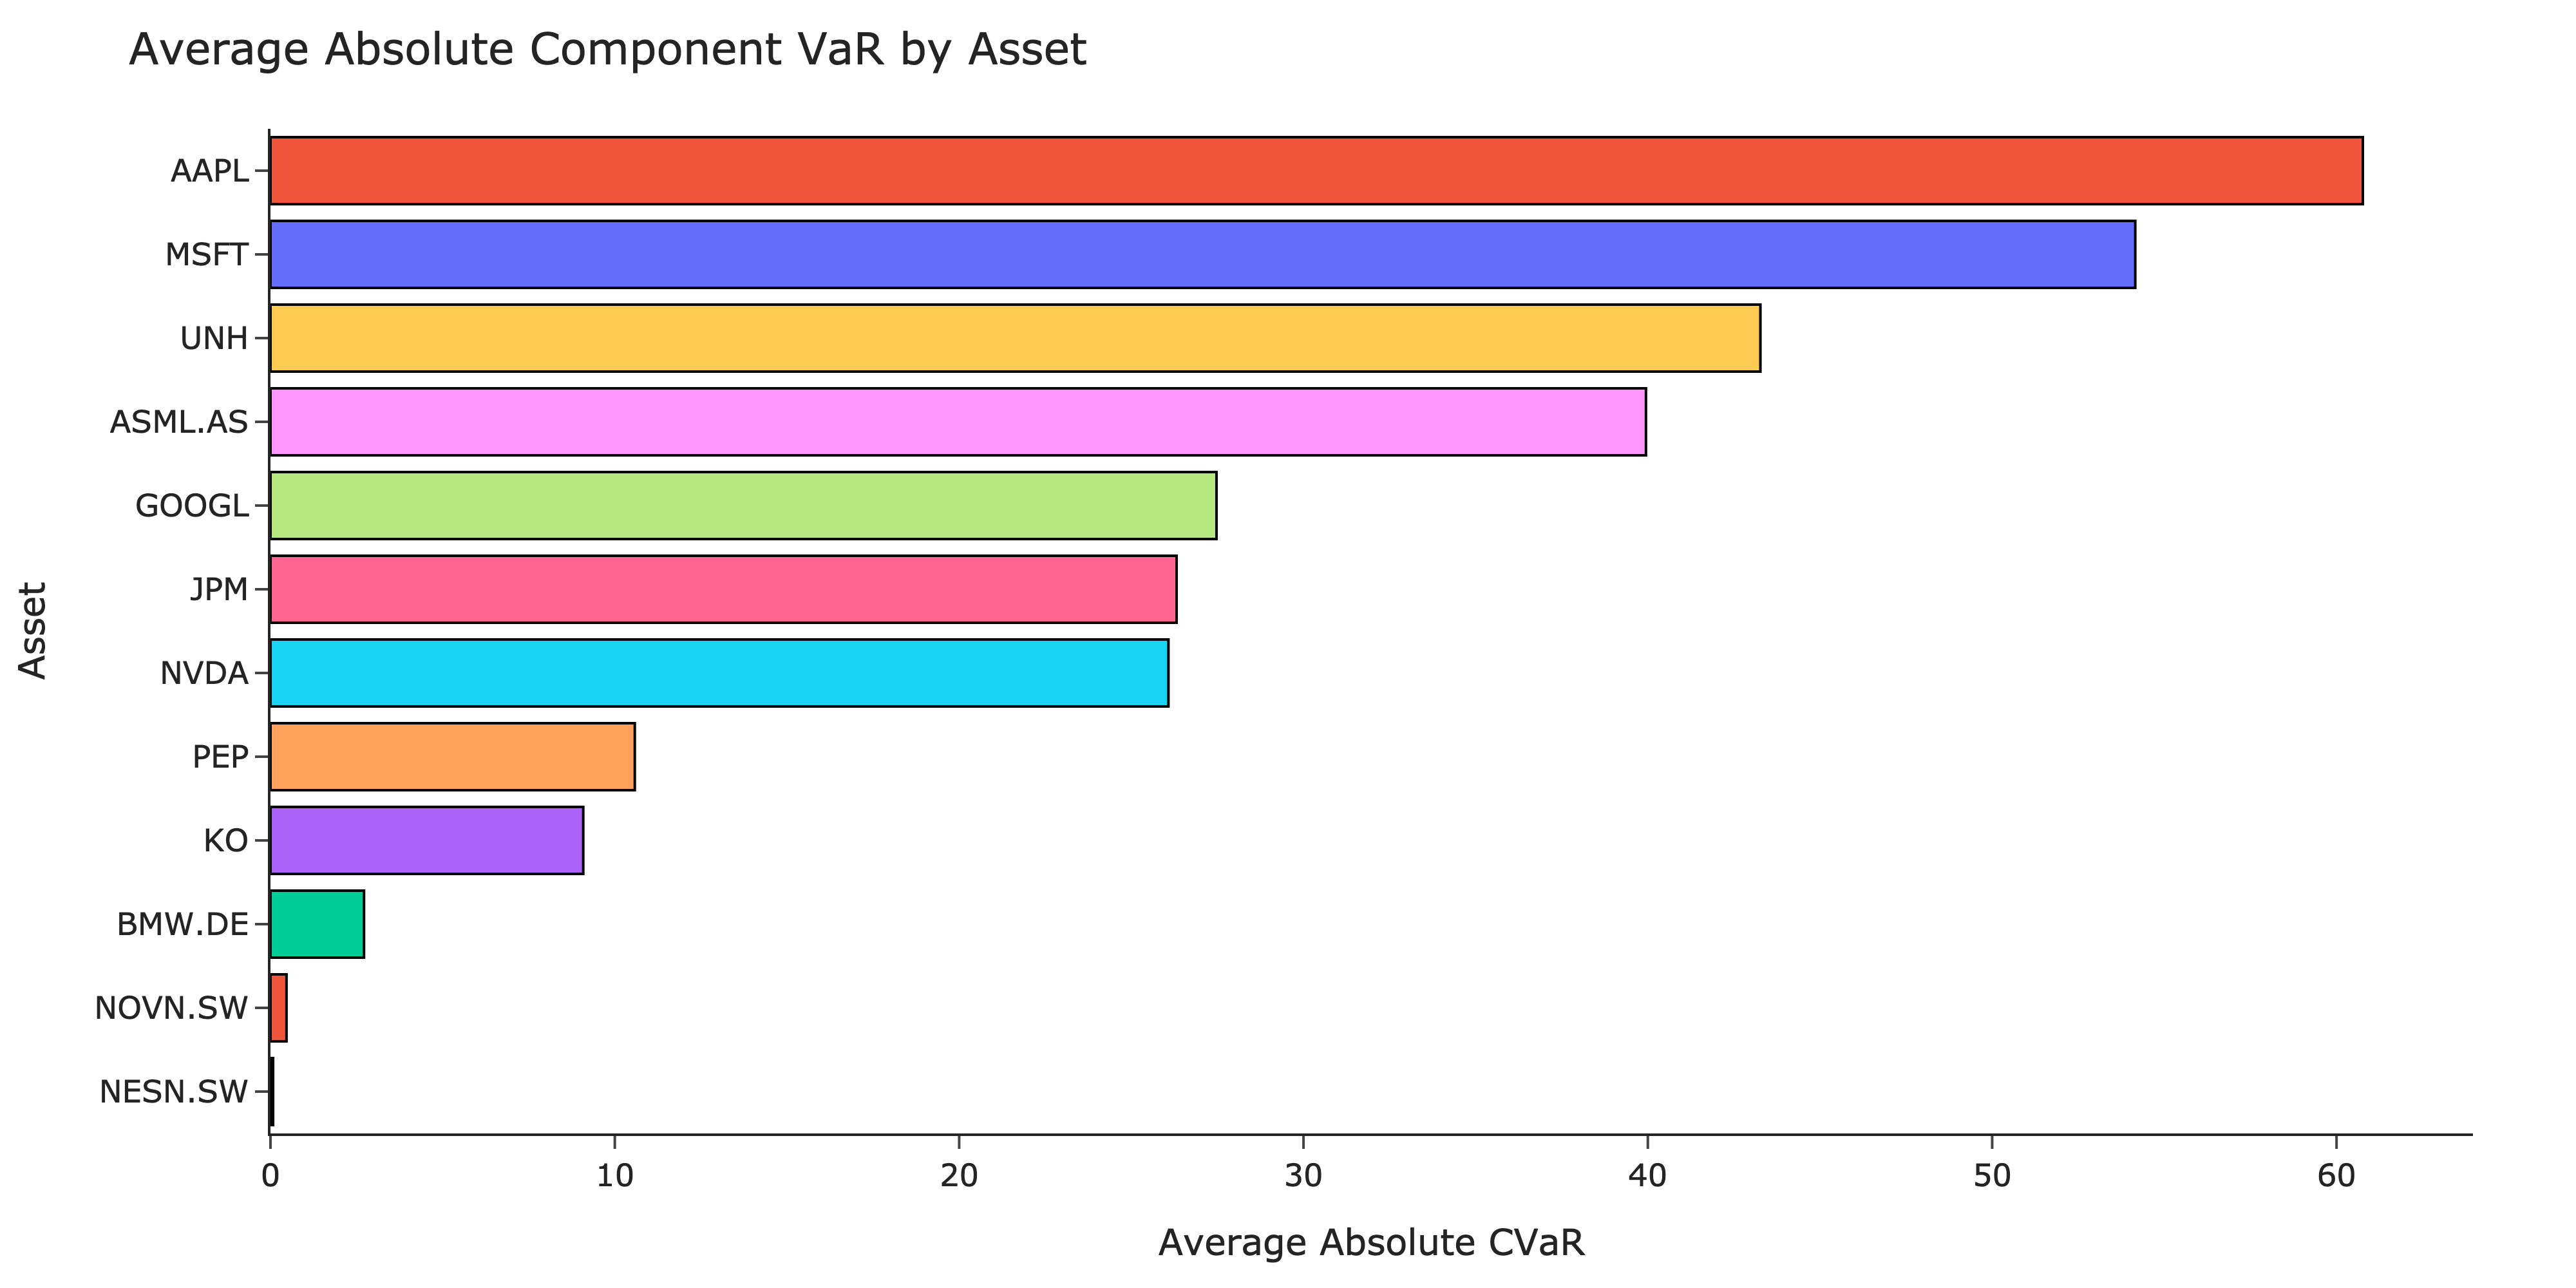

In [25]:
pl.plot_risk_contribution_bar(component_df, interactive=False)

In [26]:
pl.plot_risk_contribution_lines(component_df, interactive=True)

In [28]:
pl.plot_correlation_matrix(position_data, interactive=True)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.